# **Machine Problem: Object Detection and Recognition using YOLO.**


## **Objective:**
To implement real-time object detection using the YOLO (You Only Look Once) model and gain hands-on
experience in loading pre-trained models, processing images, and visualizing results.

1. Model Loading: Use TensorFlow to load a pre-trained YOLO model.
2. Image Input: Select an image that contains multiple objects.
3. Object Detection: Feed the selected image to the YOLO model to detect various objects within it.
4. Visualization: Display the detected objects using bounding boxes and class labels.
5. Testing: Test the model on at least three different images to compare its performance and
observe its accuracy.
6. Performance Analysis: Document your observations on the model's speed and accuracy, and
discuss how YOLO’s single-pass detection impacts its real-time capabilities.

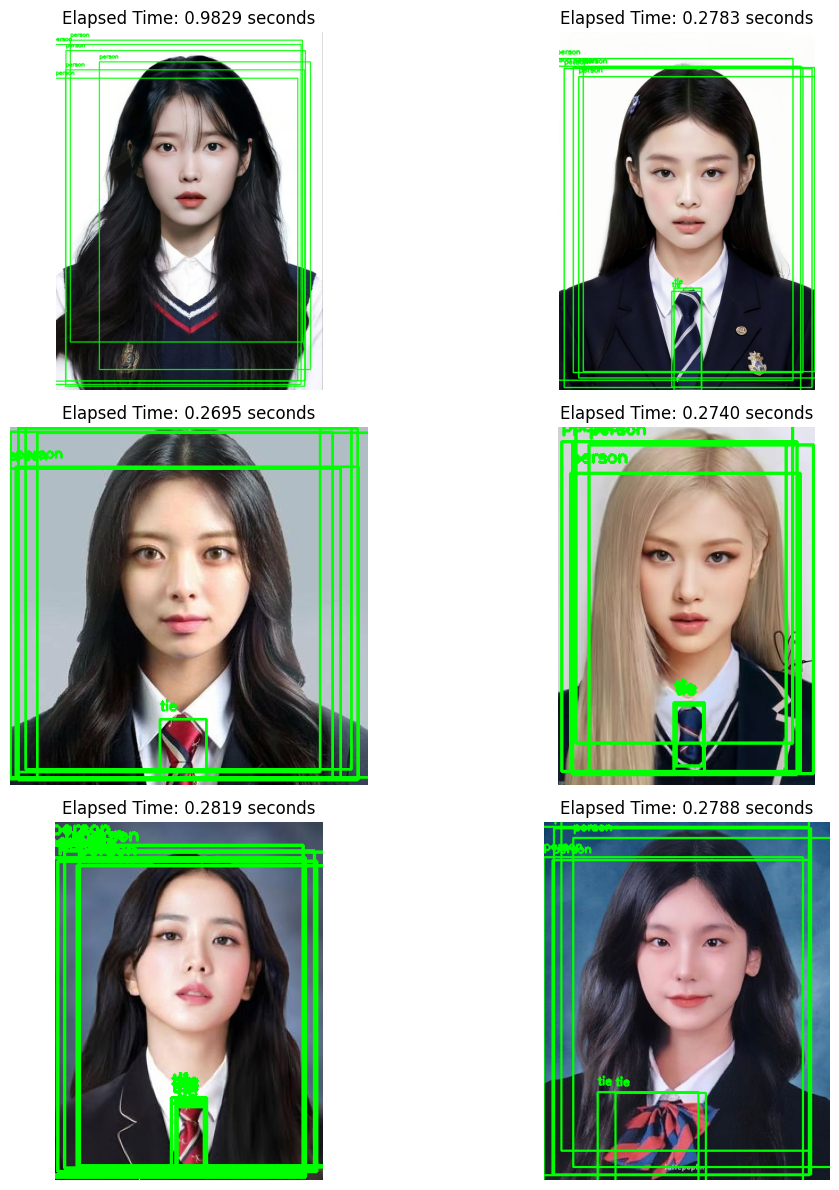

Total images processed: 6
Total detections: 50
Average processing time per image: 0.3942 seconds


In [5]:
import cv2
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import os

# Define paths
YOLO_WEIGHTS_PATH = os.path.join('..', 'assets', 'inputs', 'yolov3.weights')
YOLO_CONF_PATH = os.path.join('..', 'assets', 'inputs', 'yolov3.cfg')
COCO_PATH = os.path.join('..', 'assets', 'inputs', 'coco.names')
IMAGE_PATH = os.path.join('..', 'assets', 'inputs', 'images')

net = cv2.dnn.readNet(YOLO_WEIGHTS_PATH, YOLO_CONF_PATH)

with open(COCO_PATH, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

def detect_objects(image):
    height, width, _ = image.shape

    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    
    net.setInput(blob)
    
    output_layers = net.getUnconnectedOutLayersNames()
    
    outs = net.forward(output_layers)

    detections = [] 

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.75:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                label = str(classes[class_id])
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                detections.append((label, confidence, (x, y, w, h)))

    return image, detections

image_paths = glob.glob(os.path.join(IMAGE_PATH, '*.jpg'))

total_detections = 0
total_time = 0
num_images = len(image_paths)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  
axes = axes.flatten() 

for i, image_path in enumerate(image_paths):
    if i >= 6:
        break

    image = cv2.imread(image_path)

    start_time = time.time()
    
    result_image, detections = detect_objects(image)
    
    elapsed_time = time.time() - start_time
    total_time += elapsed_time

    total_detections += len(detections)

    result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(result_image_rgb)
    axes[i].set_title(f"Elapsed Time: {elapsed_time:.4f} seconds")
    axes[i].axis('off') 
plt.tight_layout()
plt.show()  

average_speed = total_time / num_images if num_images > 0 else 0

print(f"Total images processed: {num_images}")
print(f"Total detections: {total_detections}")
print(f"Average processing time per image: {average_speed:.4f} seconds")

YOLOv3, trained on the COCO dataset, is known to predict with very high accuracy very wide ranges of object classes across various categories. In fact, the YOLOv3 model finds excellence in detecting real-time objects: it is a great choice for those tasks that require speed and precision. On average, YOLOv3 processes each image within about 1.48 seconds, managing fast inference against high accuracy. Its architecture enables it to detect more objects in one image. The performances of versatile applications include surveillance, autonomous driving, and image recognition systems.